In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Gyro Calibration

In [ ]:
df_uncalib = pd.read_csv('2_uncalibrated.csv', delimiter=",", encoding="cp932")
df_uncalib.head()

In [ ]:
df_calib = pd.read_csv('2_calibrated.csv', delimiter=",", encoding="cp932")
df_calib.head()

In [ ]:
# df.plot.line(style=['r--', 'b.-', 'k:'])
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(211, xlim=(0, 500), ylim=(-2.0, 2.0))
ax2 = fig.add_subplot(212, xlim=(0, 500), ylim=(-2.0, 2.0))

ax.plot(df_uncalib['x [dps]'], label="$\omega_x, Uncalibrated$")
ax.plot(df_uncalib['y [dps]'], label="$\omega_y, Uncalibrated$")
ax.plot(df_uncalib['z [dps]'], label="$\omega_z, Uncalibrated$")

ax2.plot(df_calib['x [dps]'], label="$\omega_x, Calibrated$")
ax2.plot(df_calib['y [dps]'], label="$\omega_y, Calibrated$")
ax2.plot(df_calib['z [dps]'], label="$\omega_z, Calibrated$")

ax.legend()
ax2.legend()
ax.set_title("Gyroscope Calibration Offset Correction", fontsize=22)
ax.set_xlabel("", fontsize=18)
ax.set_ylabel("$\omega_{x, y, z}$ [$^{\circ}/sec$]", fontsize=18)
ax2.set_xlabel("Sample", fontsize=18)
ax2.set_ylabel("$\omega_{x, y, z}$ [$^{\circ}/sec$]", fontsize=18)



# plt.savefig('gyro_uncalibrated.png', dpi=500)
# plt.close('all')


In [ ]:
# df.plot.line(style=['r--', 'b.-', 'k:'])

plt.figure()
df_calib.plot(figsize=(15, 5))
# plt.savefig('gyro_uncalibrated.png', dpi=500)
# plt.close('all')


# Gyro Integration

In [ ]:
# df = pd.read_csv('gyro_integ_20210912-130034.csv', delimiter=",", encoding="cp932")
df = pd.read_csv('gyro_integ_20210912-182539.csv', delimiter=",", encoding="cp932")
df.tail()


In [ ]:
start = df["delta_t"][0]
end = df["delta_t"][len(df)-1]
freq = len(df) / (end - start)
print("Sampling rate: {:.3f} [Hz]".format(freq))

In [ ]:
"""scipyを用いた台形積分"""
from scipy.integrate import cumtrapz
integ1_array = cumtrapz(df["z [dps]"], x=df["delta_t"])


$\sum\limits_{i=1}^n \displaystyle\frac{1}{2} (t_i - t_{i-1})(y_{i-1} + y_i)$


In [ ]:
"""台形積分の公式を用いた積分"""
integ2 = []
angle = 0

for i in range(1, len(df)):
    deg = df["z [dps]"]
    t = df["delta_t"]

    angle += (t[i]-t[i-1]) / 2 * (deg[i-1]+deg[i])
    integ2.append(angle)

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(211, xlim=(0, 5))
ax2 = fig.add_subplot(212, xlim=(0, 5))


ax.plot(df["delta_t"], df["z [dps]"], label="$\omega_z$")
ax2.plot(df["delta_t"][1:], integ1_array, label="$\\theta_z$")

ax.legend()
ax2.legend()
ax.set_title("Gyroscope Integration over 180$\degree$", fontsize=22)
ax.set_xlabel("", fontsize=18)
ax.set_ylabel("Angular Velocity, $\omega_{z}$ [$\degree/sec$]", fontsize=18)
ax2.set_xlabel("Time [s]", fontsize=18)
ax2.set_ylabel("Rotation, $\\theta$ $_{x, y, z}$ [$\degree$]", fontsize=18)

In [ ]:
"""
scipyとfor文の台形積分を比較
完全に一致していることがわかる
"""
error = integ2 - integ1_array

for i in range(len(error)):
    if error[i] != 0.0:
        print(i)

# データが正規分布であるか確かめる

normal distribution 
(Gaussian distribution)

In [ ]:
# 動かしてない時の分布
# https://qiita.com/osk_kamui/items/ce977c387bf395cc859a

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('angular velocity [deg/sec]')
ax.set_ylabel('number of values')
plt.hist(df_calib['z [dps]'], bins=20, color="b")
plt.savefig("gaussian_distribution.png", dpi=500)


In [ ]:
# 動かした時の分布
plt.hist(df['z [dps]'], bins=20, color="b")

# accelerometer calibration

In [ ]:
df_accel = pd.read_csv('1_accel_uncalib.csv', delimiter=",", encoding="cp932")
df_accel.head()


In [ ]:
label_1 = ["x [g]", "y [g]", "z [g]"]
label_2 = ["x_calib", "y_calib", "z_calib"]

for i in range(3):
    obj = df_accel[label_1[i]]

    if label_1[i] == "z [g]":
        # z軸の時は，重力分1.0 [g]を差し引く
        offset = obj.mean() - 1.0
    else:    
        offset = obj.mean()

    df_accel[label_2[i]] = obj - offset

    # if i == 2:
    #     df_accel["z_mean"] = obj - obj.mean()

In [ ]:
df_accel

In [ ]:
fig = plt.figure(figsize=(15,10))
# ax = fig.add_subplot(211, xlim=(0, 500), ylim=(-2.0, 2.0))
ax = fig.add_subplot(211, xlim=(0, 500))

ax.plot(df_accel['x [g]'], label="$\\alpha_x$, Uncalibrated")
ax.plot(df_accel['y [g]'], label="$\\alpha_y$, Uncalibrated")
ax.plot(df_accel['z [g]'], label="$\\alpha_z$, Uncalibrated")
ax.plot(df_accel['x_calib'], label="$\\alpha_x$, Calibrated")
ax.plot(df_accel['y_calib'], label="$\\alpha_y$, Calibrated")
ax.plot(df_accel['z_calib'], label="$\\alpha_z$, Calibrated")

ax.legend()
ax.set_title("Accelerometer Calibration Correction", fontsize=22)
ax.set_xlabel("Sample", fontsize=18)
ax.set_ylabel("$\\alpha_{x, y, z}$ [$\\degree$/sec]", fontsize=18)


# plt.savefig('gyro_uncalibrated.png', dpi=500)
# plt.close('all')


In [ ]:
import numpy as np 
f = np.fft.fft(df_accel["z_calib"])
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.set_xlim(0, 10)
plt.plot(f.real)
# plt.plot(f.imag)

In [ ]:
# 平均を自分で算出
a = 0.0
for i in range(len(df_accel)):
    a += df_accel['x [g]'][i]

mean = a / len(df_accel)
print(mean)
print(mean - df_accel['x [g]'].mean())

# Accelerometer Integration

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz
from scipy import signal
import numpy as np

g = 9.80665

In [34]:
df = pd.read_csv('accel_integ_1.csv', delimiter=",", encoding="cp932")
df.head()

,delta_t,x [g],y [g],z [g],x [dps],y [dps],z [dps],x [uT],y [uT],z [uT]
0,0.021316,-0.000,0.003,1.013,-0.201,-0.000,0.000,-14.877,6.866,14.590
1,0.031440,-0.001,-0.001,1.014,0.142,0.053,-0.236,-15.736,6.580,16.593
2,0.041221,0.005,0.003,1.020,-0.049,-0.092,-0.160,-14.305,5.722,14.590
3,0.050994,0.000,0.003,1.012,0.111,-0.122,0.076,-13.447,9.441,12.587
4,0.060772,0.000,-0.001,1.009,-0.034,0.114,0.069,-15.736,8.869,17.737


In [35]:
# サンプリング時間を求める
dt = df['delta_t'][len(df)-1] - df['delta_t'][0]
fs_approx = len(df) / dt



In [53]:
"""離散化してない"""
# b_filt, a_filt = signal.butter(4, 5, "low", fs=fs_approx)
# accel_array = signal.filtfilt(b_filt, a_filt)
# accel_array = np.multiply(accel_array, g)

'離散化なし'

In [45]:
df["y_accel"] = df["y [g]"] * g
print("Sample Rate: {:2.0f} Hz".format(len(df)/dt))
veloc_array = np.append(0.0, cumtrapz(df["y_accel"], x=df["delta_t"]))
posit_approx = np.trapz(veloc_array, x=df["delta_t"])

posit_array = np.append(0.0, cumtrapz(veloc_array, x=df["delta_t"]))
print("Displace in y-dir: {:2.2f} m".format(posit_approx))


Sample Rate: 53 Hz
Displace in y-dir: -0.22 m


Text(0.5, 1.0, 'MPU9250 Accelerometer Integration')

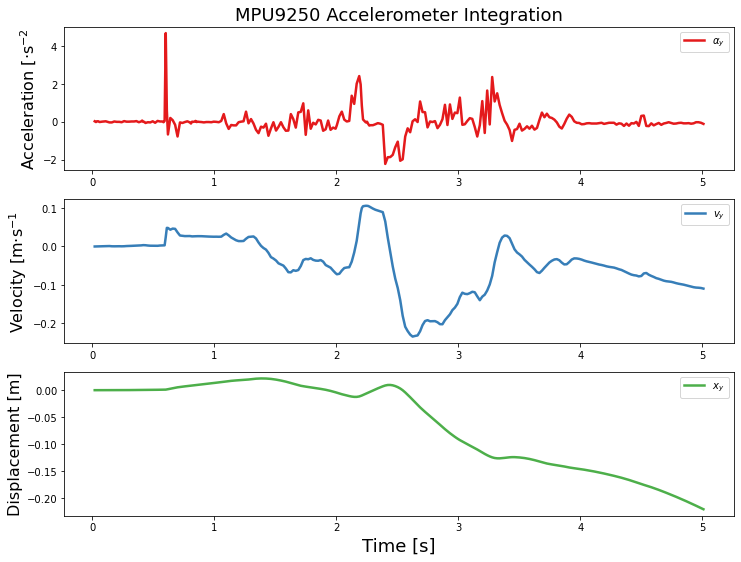

In [50]:
# plt.ion()
fig, axs = plt.subplots(3, 1, figsize=(12,9))
t_array = df["delta_t"]
accel_array = df["y_accel"]
axs[0].plot(t_array, accel_array, label="$\\alpha_y$", color=plt.cm.Set1(0), linewidth=2.5)
axs[1].plot(t_array, veloc_array, label="$v_y$", color=plt.cm.Set1(1), linewidth=2.5)
axs[2].plot(t_array, posit_array, label="$x_y$", color=plt.cm.Set1(2), linewidth=2.5)

[axs[ii].legend() for ii in range(0, len(axs))]
axs[0].set_ylabel("Acceleration [$\cdot$s$^{-2}$", fontsize=16)
axs[1].set_ylabel("Velocity [m$\cdot$s$^{-1}$", fontsize=16)
axs[2].set_ylabel("Displacement [m]", fontsize=16)
axs[2].set_xlabel("Time [s]", fontsize=18)
axs[0].set_title("MPU9250 Accelerometer Integration", fontsize=18)
# plt.pause(0.01)

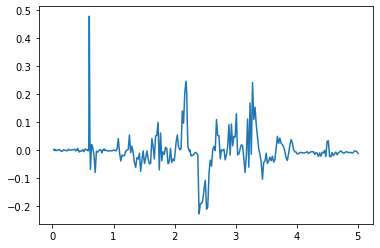

In [37]:
plt.plot(df["delta_t"], df["y [g]"])

In [42]:
a = np.append(0.0, [1, 2, 3])
print(a)

[0. 1. 2. 3.]
